In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime
import itertools
import matplotlib.dates as mdates
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker

In [2]:
plt.style.use('seaborn-poster')

In [3]:
#cases daily
#x= "4 mar, 5 mar, 6 mar, 7 mar, 8 mar, 9 mar, 10 mar, 11 mar, 12 mar, 13 mar, 14 mar, 15 mar, 16 mar, 17 mar, 18 mar, 19 mar, 20 mar, 21 mar, 22 mar, 23 mar, 24 mar, 25 mar, 26 mar, 27 mar, 28 mar, 29 mar, 30 mar, 31 mar, 1 kwi, 2 kwi, 3 kwi, 4 kwi, 5 kwi, 6 kwi, 7 kwi, 8 kwi, 9 kwi, 10 kwi, 11 kwi, 12 kwi, 13 kwi, 14 kwi, 15 kwi, 16 kwi, 17 kwi, 18 kwi, 19 kwi, 20 kwi, 21 kwi, 22 kwi, 23 kwi, 24 kwi, 25 kwi, 26 kwi, 27 kwi, 28 kwi, 29 kwi, 30 kwi, 1 maj"
#y1="1, 0, 4, 1, 5, 6, 5, 9, 20, 17, 36, 21, 52, 61, 49, 68, 70, 111, 98, 115, 152, 150, 170, 168, 249, 224, 193, 256, 243, 392, 437, 244, 475, 311, 435, 357, 370, 380, 401, 318, 260, 268, 380, 336, 461, 363, 545, 306, 263, 313, 342, 381, 381, 344, 285, 316, 422, 237, 228"
x= "4 mar, 5 mar, 6 mar, 7 mar, 8 mar, 9 mar, 10 mar, 11 mar, 12 mar, 13 mar, 14 mar, 15 mar, 16 mar, 17 mar, 18 mar, 19 mar, 20 mar, 21 mar, 22 mar, 23 mar, 24 mar, 25 mar, 26 mar, 27 mar, 28 mar, 29 mar, 30 mar, 31 mar, 1 kwi, 2 kwi, 3 kwi, 4 kwi, 5 kwi, 6 kwi, 7 kwi, 8 kwi, 9 kwi, 10 kwi, 11 kwi, 12 kwi, 13 kwi, 14 kwi, 15 kwi, 16 kwi, 17 kwi, 18 kwi, 19 kwi, 20 kwi, 21 kwi, 22 kwi, 23 kwi, 24 kwi, 25 kwi, 26 kwi, 27 kwi, 28 kwi, 29 kwi, 30 kwi, 1 maj, 2 maj, 3 maj" 
y1="1, 0, 4, 1, 5, 6, 5, 9, 20, 17, 36, 21, 52, 61, 49, 68, 70, 111, 98, 115, 152, 150, 170, 168, 249, 224, 193, 256, 243, 392, 437, 244, 475, 311, 435, 357, 370, 380, 401, 318, 260, 268, 380, 336, 461, 363, 545, 306, 263, 313, 342, 381, 381, 344, 285, 316, 422, 300, 228, 270, 318"

In [4]:
x_cases = x.split(", ")
y_cases = y1.split(", ")
y_cases = [float(el) for el in y_cases]

In [5]:
#tests daily
#x= "3 mar, 4 mar, 5 mar, 6 mar, 7 mar, 8 mar, 9 mar, 10 mar, 11 mar, 12 mar, 13 mar, 14 mar, 15 mar, 16 mar, 17 mar, 18 mar, 19 mar, 20 mar, 21 mar, 22 mar, 23 mar, 24 mar, 25 mar, 26 mar, 27 mar, 28 mar, 29 mar, 30 mar, 31 mar, 1 kwi, 2 kwi, 3 kwi, 4 kwi, 5 kwi, 6 kwi, 7 kwi, 8 kwi, 9 kwi, 10 kwi, 11 kwi, 12 kwi, 13 kwi, 14 kwi, 15 kwi, 16 kwi, 17 kwi, 18 kwi, 19 kwi, 20 kwi, 21 kwi, 22 kwi, 23 kwi, 24 kwi, 25 kwi, 26 kwi, 27 kwi, 28 kwi, 29 kwi, 30 kwi, 1 maj"
#y1= "559, 25, 92, 179, 0, 299, 230, 246, 394, 210, 655, 1525, 1079, 1206, 1200, 1616, 1681, 1876, 2012, 2523, 2520, 2771, 3326, 3340, 4503, 4307, 4409, 3824, 4812, 4382, 5377, 5760, 5963, 7856, 4710, 6748, 7069, 8313, 10698, 11265, 8447, 5623, 4691, 8172, 12578, 10583, 13306, 11286, 9990, 10120, 14444,  11920, 14482, 13793, 11639, 7226, 12885, 13783, 13500, 16601"

x= "3 mar, 4 mar, 5 mar, 6 mar, 7 mar, 8 mar, 9 mar, 10 mar, 11 mar, 12 mar, 13 mar, 14 mar, 15 mar, 16 mar, 17 mar, 18 mar, 19 mar, 20 mar, 21 mar, 22 mar, 23 mar, 24 mar, 25 mar, 26 mar, 27 mar, 28 mar, 29 mar, 30 mar, 31 mar, 1 kwi, 2 kwi, 3 kwi, 4 kwi, 5 kwi, 6 kwi, 7 kwi, 8 kwi, 9 kwi, 10 kwi, 11 kwi, 12 kwi, 13 kwi, 14 kwi, 15 kwi, 16 kwi, 17 kwi, 18 kwi, 19 kwi, 20 kwi, 21 kwi, 22 kwi, 23 kwi, 24 kwi, 25 kwi, 26 kwi, 27 kwi, 28 kwi, 29 kwi, 30 kwi, 1 maj, 2 maj, 3 maj"
y1= "559, 25, 92, 179, 0, 299, 230, 246, 394, 210, 655, 1525, 1079, 1206, 1200, 1616, 1681, 1876, 2012, 2523, 2520, 2771, 3326, 3340, 4503, 4307, 4409, 3824, 4812, 4382, 5377, 5760, 5963, 7856, 4710, 6748, 7069, 8313, 10698, 11265, 8447, 5623, 4691, 8172, 12578, 10583, 13306, 11286, 9990, 10119, 14444, 11920, 14482, 13793, 11639, 7226, 12885, 13783, 13500, 16601, 11385, 9935"

In [6]:
x_tests = x.split(", ")[1:]
y_tests = y1.split(", ")[1:]
y_tests = [float(el) for el in y_tests]

[Text(0, 0.5, 'Liczba potwierdzonych zakażeń'), Text(0.5, 0, 'Data')]

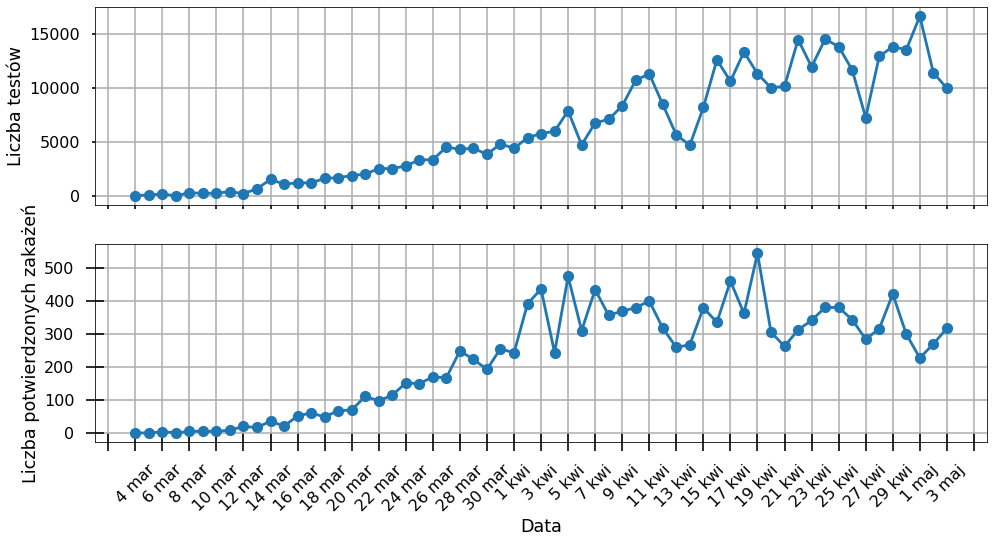

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8), sharex=True)
ax1.plot(x_tests, y_tests, marker="o")
ax2.plot(x_cases, y_cases, marker="o")
tick_spacing=2
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.xaxis.set_tick_params(rotation=45, direction="out")

ax2.tick_params(direction='inout', length=18, colors='k')  
ax1.grid(True)
ax2.grid(True)

ax1.set(#xlabel="Data",
       ylabel="Liczba testów",
        title="")
ax2.set(xlabel="Data",
       ylabel="Liczba potwierdzonych zakażeń",)
#       title="Czas niezbędny do podwojenia liczby przypadków w aktualnym tempie wzrostu")



In [17]:
np.mean(y_cases[28:])

346.8181818181818

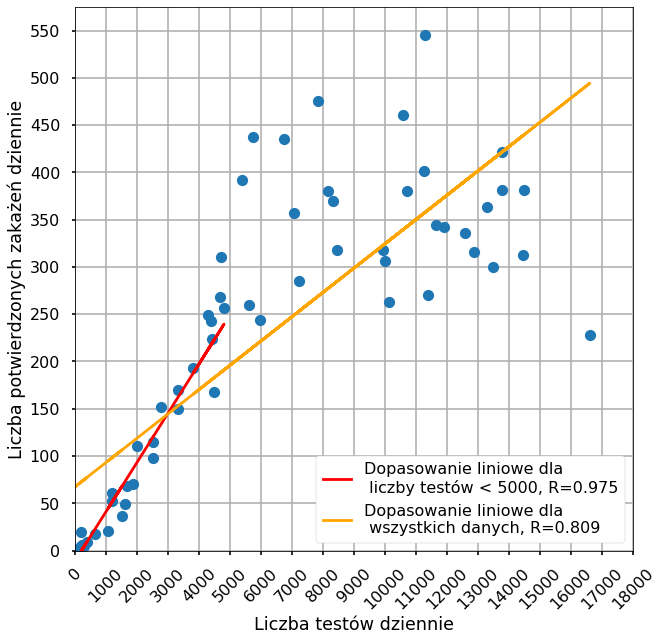

In [9]:
def linear(x,a,b):
    y = a*x + b
    return y

linear_popt, linear_pcov = curve_fit(linear, y_tests, y_cases)
linear_fit = linear(np.array(y_tests), *linear_popt)
correlation = np.corrcoef(y_tests, y_cases)
R=np.round(correlation[0,1],3)

#Only for number of tests below 5000
linear_popt, linear_pcov = curve_fit(linear, y_tests[:29], y_cases[:29])
limited_linear_fit = linear(np.array(y_tests), *linear_popt)
correlation = np.corrcoef(y_tests[:29], y_cases[:29])
R_limited=np.round(correlation[0,1],3)


fig, (ax1) = plt.subplots(1,1, figsize=(10,10), sharex=True)
ax1.plot(y_tests, y_cases, marker="o", linestyle="",)
ax1.plot(y_tests[:29], limited_linear_fit[:29], color="red", label="Dopasowanie liniowe dla \n liczby testów < 5000, R="+str(R_limited))
ax1.plot(y_tests, linear_fit,  color="orange", label="Dopasowanie liniowe dla \n wszystkich danych, R="+str(R))

ax1.xaxis.set_tick_params(rotation=45, direction="out")
ax1.grid(True)

ax1.set_xlim([0,18000])
ax1.set_ylim([0,575])

x_tick_spacing=1000
ax1.xaxis.set_major_locator(ticker.MultipleLocator(x_tick_spacing))

y_tick_spacing=50
ax1.yaxis.set_major_locator(ticker.MultipleLocator(y_tick_spacing))

ax1.set(xlabel="Liczba testów dziennie",
       ylabel="Liczba potwierdzonych zakażeń dziennie",)
legend = ax1.legend(frameon=1, facecolor='white', framealpha=1, fontsize=16, handlelength=1.8, loc='lower right')


